In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "Dataset 3/Train"

training_datagen = ImageDataGenerator(rescale=1./255,
																			zoom_range=0.15,
																			horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = "Dataset 3/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [3]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 89s 6s/step - loss: 8.2459 - acc: 0.8367 - val_loss: 0.1367 - val_acc: 0.9541
Epoch 2/20
14/14 [==============================] - 80s 6s/step - loss: 0.0936 - acc: 0.9641 - val_loss: 0.2033 - val_acc: 0.9337
Epoch 3/20
14/14 [==============================] - 83s 6s/step - loss: 0.6555 - acc: 0.8971 - val_loss: 0.1148 - val_acc: 0.9439
Epoch 4/20
14/14 [==============================] - 84s 6s/step - loss: 0.1847 - acc: 0.9426 - val_loss: 0.1110 - val_acc: 0.9592
Epoch 5/20
14/14 [==============================] - 86s 6s/step - loss: 0.7807 - acc: 0.9222 - val_loss: 0.1162 - val_acc: 0.9541
Epoch 6/20
14/14 [==============================] - 85s 6s/step - loss: 0.1360 - acc: 0.9510 - val_loss: 0.1024 - val_acc: 0.9592
Epoch 7/20
14/14 [==============================] - 85s 6s/step - loss: 0.0737 - acc: 0.9713 - val_loss: 0.2596 - val_acc: 0.9082
Epoch 8/20
14/14 [==============================] - 85s 6s/step - loss: 0.1464 - acc: 0.94

In [4]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

D:\anaconda\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
14/14 [==============================] - 114s 8s/step - loss: 0.5678 - acc: 0.7416 - val_loss: 0.1095 - val_acc: 0.9694
Epoch 2/10
14/14 [==============================] - 113s 8s/step - loss: 0.3865 - acc: 0.8008 - val_loss: 0.1124 - val_acc: 0.9643
Epoch 3/10
14/14 [==============================] - 117s 8s/step - loss: 0.2904 - acc: 0.8451 - val_loss: 0.1162 - val_acc: 0.9592
Epoch 4/10
14/14 [==============================] - 121s 9s/step - loss: 0.2350 - acc: 0.8714 - val_loss: 0.1214 - val_acc: 0.9541
Epoch 5/10
14/14 [==============================] - 122s 9s/step - loss: 0.1932 - acc: 0.8983 - val_loss: 0.1118 - val_acc: 0.9541
Epoch 6/10
14/14 [==============================] - 121s 9s/step - loss: 0.1709 - acc: 0.9091 - val_loss: 0.1218 - val_acc: 0.9541
Epoch 7/10
14/14 [==============================] - 121s 9s/step - loss: 0.1421 - acc: 0.9294 - val_loss: 0.1312 - val_acc: 0.9388
Epoch 8/10
14/14 [==============================] - 121s 9s/step - loss: 0.1265 - a

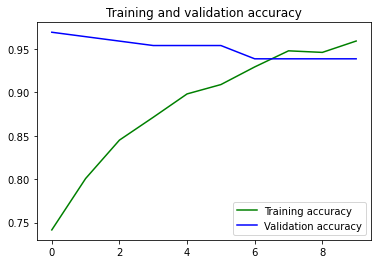

<Figure size 432x288 with 0 Axes>

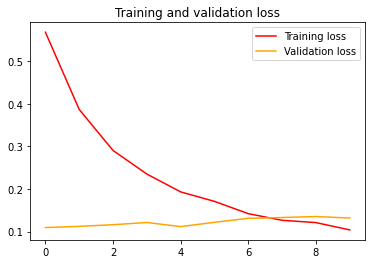

<Figure size 432x288 with 0 Axes>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [15]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
#Load the saved model
#model = tf.keras.models.load_model('InceptionV3.h5')
video = cv2.VideoCapture(0)
while True:
        _, frame = video.read()
#Convert the captured frame into RGB
        im = Image.fromarray(frame, 'RGB')
#Resizing into 224x224 because we trained the model with this image size.
        im = im.resize((224,224))
        img_array = image.img_to_array(im)
        img_array = np.expand_dims(img_array, axis=0) / 255
        probabilities = model.predict(img_array)[0]
        #Calling the predict method on model to predict 'fire' on the image
        prediction = np.argmax(probabilities)
        #if prediction is 0, which means there is fire in the frame.
        if prediction == 0:
                frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
                print(probabilities[prediction])
        cv2.imshow("Capturing", frame)
        key=cv2.waitKey(1)
        if key == ord('q'):
                break
video.release()
cv2.destroyAllWindows()

0.61986464
0.61986464
0.94671875
0.94671875
0.83420193
0.82431966
0.86004835
0.94967794
0.94967794
0.59738225
0.56389654
0.695685
0.91191125
0.9746753
0.9746753
0.5259885
0.55729574
0.6545312
0.62830925
0.5070282
0.5961976
0.5961976
0.5001393
0.5578898
0.6183814
0.5641069
0.5665575
0.5665575
0.7713392
0.5938519
0.654967
0.6071487
0.5394564
0.67092764
0.56678706
0.5120934
0.5120934
0.5110407
0.5110407
0.93779457
0.875858
0.9380909
0.9768747
0.9911447
0.9797402
0.9684798
0.9887101
0.9887101
0.99632436
0.9723891
0.9904384
0.9904384
0.7752735
0.5259068
